In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

sns.set(rc={"axes.facecolor":"#F2F2F2","figure.facecolor":"#FFFFFF","figure.figsize":(10,6),"figure.dpi":300})
pallet = ["#6a0d83", "#5B267B", "#726974", "#42838C", "#119DA4", "#19647E"]
cmap = colors.ListedColormap(pallet)

In [2]:
df = pd.read_csv('fruitdatafinal.csv')

In [3]:
df.head(5)

,Unnamed: 0,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,...,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,Labeled Class
0,0,422163,2378.9080,837.8484,645.6693,0.6373,0.9947,0.7831,1.2976,0.9374,...,-0.5661,-0.0114,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,0
1,1,338136,2085.1440,723.8198,595.2073,0.5690,0.9974,0.7795,1.2161,0.9773,...,-0.2328,0.1349,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,0
2,4,347562,2160.3540,763.9877,582.8359,0.6465,0.9908,0.7569,1.3108,0.9358,...,-0.3552,0.2101,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,0
3,5,408953,2326.6931,840.1821,622.0076,0.6722,0.9974,0.7805,1.3508,0.9493,...,0.1189,0.9400,1.5571,3.6309,6.0285,6.2159,-41140371456,-33146710016,-27907301376,0
4,6,451414,2457.2080,889.3253,652.4316,0.6796,0.9970,0.7877,1.3631,0.9395,...,0.0606,0.4530,0.9431,3.0703,3.4163,4.9168,-63711666176,-64060743680,-52603465728,0


In [4]:
df.describe()

,Unnamed: 0,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,...,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,Labeled Class
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,...,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,5.880000e+02,5.880000e+02,5.880000e+02,588.000000
mean,399.056122,279020.076531,1965.968348,718.684665,479.478294,0.738745,0.987063,0.747677,1.522221,0.872513,...,-0.255323,0.221541,0.065397,3.137657,3.859823,3.180058,-3.372318e+10,-3.010771e+10,-2.848523e+10,2.960884
std,252.098022,108643.866573,406.462554,138.912469,113.718825,0.072657,0.006794,0.045480,0.175591,0.043574,...,0.560948,0.766954,0.461021,1.017786,2.425553,0.945974,1.726827e+10,1.472193e+10,1.276868e+10,1.761843
min,0.000000,100471.000000,1186.373000,434.745400,292.624300,0.514100,0.960900,0.608900,1.165900,0.725900,...,-1.603200,-1.560800,-0.988400,1.876800,1.607600,1.767200,-8.281585e+10,-7.165627e+10,-6.272971e+10,0.000000
25%,186.250000,165077.750000,1547.966000,587.888450,366.877325,0.694925,0.983875,0.720475,1.390575,0.849525,...,-0.610275,-0.295825,-0.261300,2.459225,2.455700,2.525750,-4.550830e+10,-3.935815e+10,-3.683794e+10,2.000000
50%,353.500000,284368.000000,2028.489500,748.097000,476.556500,0.754850,0.988700,0.755400,1.524600,0.875150,...,-0.300950,0.091800,-0.004950,2.812350,2.888400,2.869700,-3.063680e+10,-2.781569e+10,-2.487659e+10,2.000000
75%,578.250000,375374.750000,2345.354150,835.008175,581.136000,0.789525,0.992000,0.781800,1.629325,0.899175,...,0.036575,0.566375,0.356150,3.442950,4.005375,3.513975,-2.138237e+10,-1.865762e+10,-1.848268e+10,4.000000
max,897.000000,514745.000000,2718.394000,1040.528300,735.891000,0.875700,0.997400,0.856200,2.070900,0.977300,...,1.628600,2.812400,1.639000,7.243400,14.446100,6.799900,-2.989908e+09,-5.908136e+09,-7.991440e+09,6.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     588 non-null    int64  
 1   AREA           588 non-null    int64  
 2   PERIMETER      588 non-null    float64
 3   MAJOR_AXIS     588 non-null    float64
 4   MINOR_AXIS     588 non-null    float64
 5   ECCENTRICITY   588 non-null    float64
 6   SOLIDITY       588 non-null    float64
 7   EXTENT         588 non-null    float64
 8   ASPECT_RATIO   588 non-null    float64
 9   ROUNDNESS      588 non-null    float64
 10  COMPACTNESS    588 non-null    float64
 11  SHAPEFACTOR_1  588 non-null    float64
 12  SHAPEFACTOR_2  588 non-null    float64
 13  SHAPEFACTOR_4  588 non-null    float64
 14  MeanRR         588 non-null    float64
 15  MeanRG         588 non-null    float64
 16  MeanRB         588 non-null    float64
 17  StdDevRR       588 non-null    float64
 18  StdDevRG  

In [6]:
df_copy = df.copy()
df_copy.shape

(588, 30)

In [7]:
X = df_copy.drop(['Labeled Class'],axis=1)

In [8]:
y = df_copy['Labeled Class']

In [9]:
# Standard Scalling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
standard_scaler = StandardScaler()

In [12]:
X = standard_scaler.fit_transform(X)

In [13]:
# Splitting Data Set for model training and testing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Labeled Class', ylabel='count'>

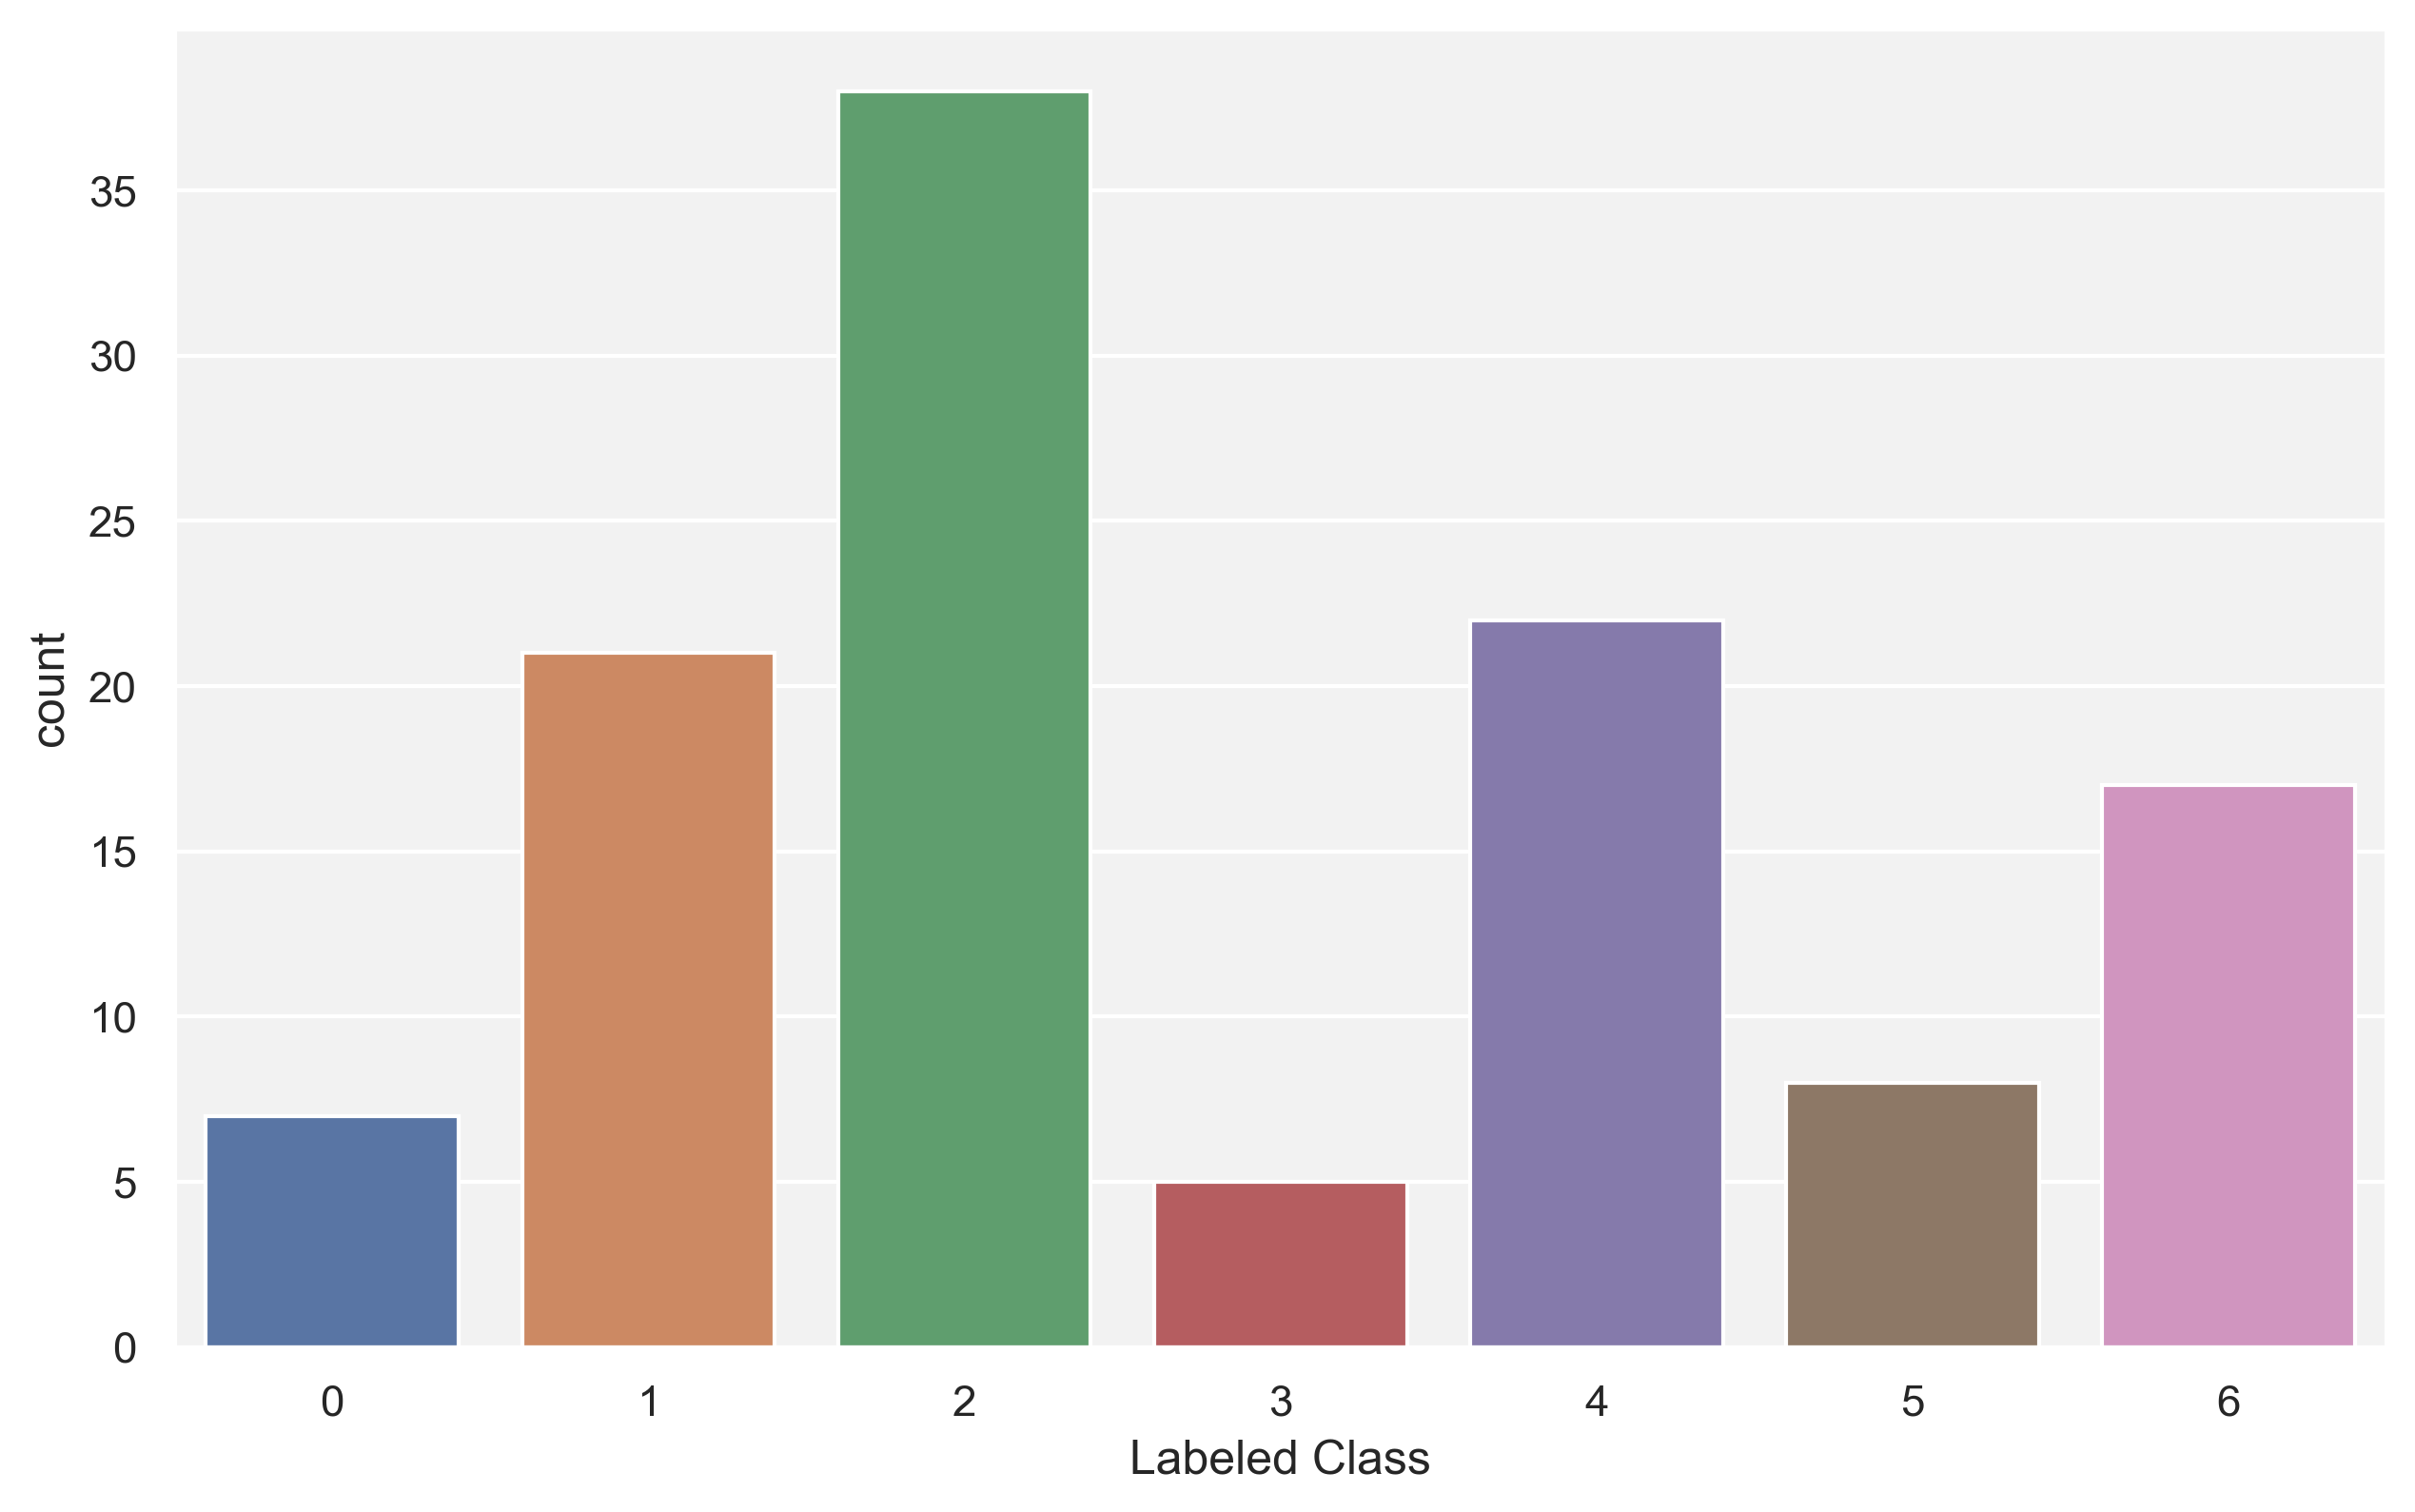

In [16]:
sns.countplot(x=y_test)

# Support Vector Machine

In [17]:
from sklearn.svm import SVC

In [18]:
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
for kernel in kernels:
    support_vector_classification = SVC(kernel=kernel)
    support_vector_classification.fit(X_train, y_train)
    print(support_vector_classification.score(X_train, y_train))

0.9936170212765958
0.9382978723404255
0.9531914893617022
0.9808510638297873


In [19]:
# linear kernal has more accuracy in SVC, So lets use SVC

In [20]:
support_vector_classification = SVC(kernel='linear')

In [21]:
support_vector_classification.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
y_predict = support_vector_classification.predict(X_test)

In [23]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.90      0.95        21
           2       0.97      1.00      0.99        38
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        17

    accuracy                           0.98       118
   macro avg       0.98      0.99      0.98       118
weighted avg       0.98      0.98      0.98       118



In [24]:
print(confusion_matrix(y_test,y_predict))

[[ 7  0  0  0  0  0  0]
 [ 1 19  1  0  0  0  0]
 [ 0  0 38  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0 22  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0 17]]


<Axes: >

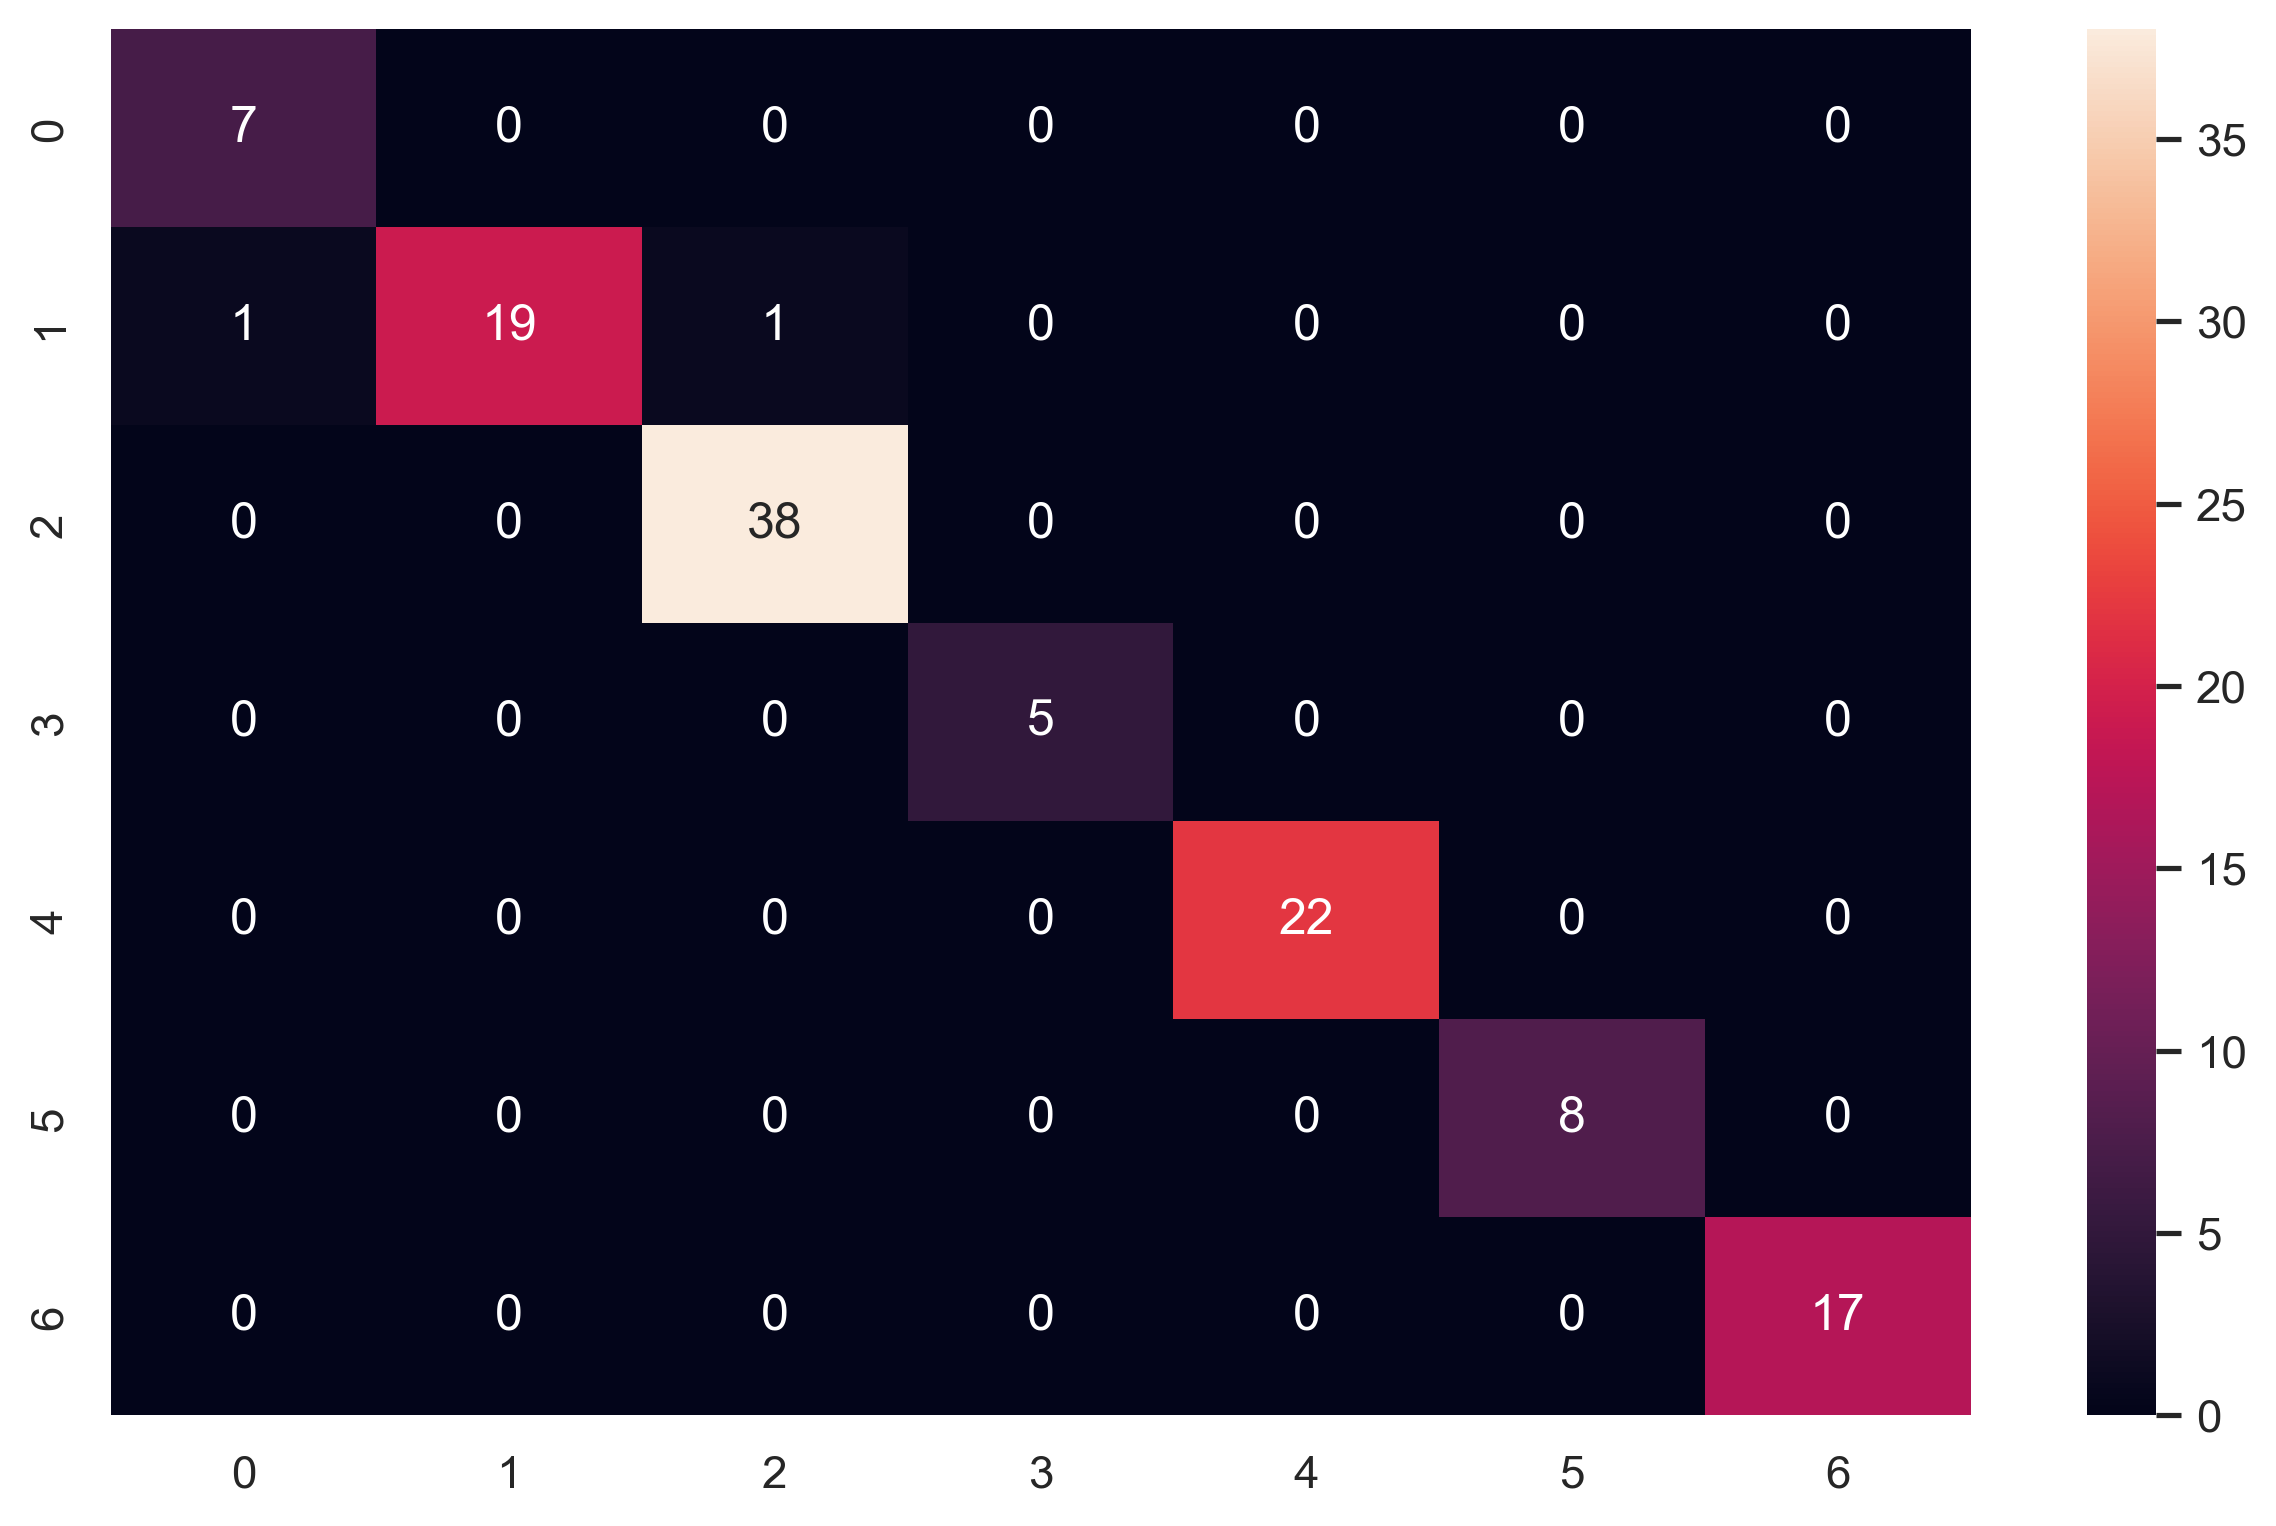

In [25]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

In [26]:
support_vector_classification.class_weight_

array([1., 1., 1., 1., 1., 1., 1.])

## GridSearch

- Finding the right parameters (such as the values of <em>C</em> or <em>gamma</em> to use) is a complicated task
- The idea of creating a "grid" of parameters and trying out all the possible combinations is called <em>GridSearch</em>
    - This method is common enough for Scikit-learnto have this functionality incorporated with <em>GridSearchCV</em> (<em>CV</em> stands for <em>Cross-Validation</em>)
    - <em>GridSearchCV</em> receives a dictionary describing the parameters to be tried and the model to be trained
    - The parameter grid is defined as a dictionary in which the keys are the parameters and the values are the settings to be tested

In [27]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear','rbf','sigmoid','poly']}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid = GridSearchCV(SVC(random_state=2021), param_grid, refit=True, verbose=3)

In [30]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.968 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.979 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.309 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.309 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.309 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.298 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.298 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.596 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             verbose=3)

In [31]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [32]:
grid.best_estimator_

SVC(C=1000, gamma=0.001, random_state=2021)

In [33]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.90      0.95        21
           2       0.97      1.00      0.99        38
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        17

    accuracy                           0.98       118
   macro avg       0.98      0.99      0.98       118
weighted avg       0.98      0.98      0.98       118



In [34]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

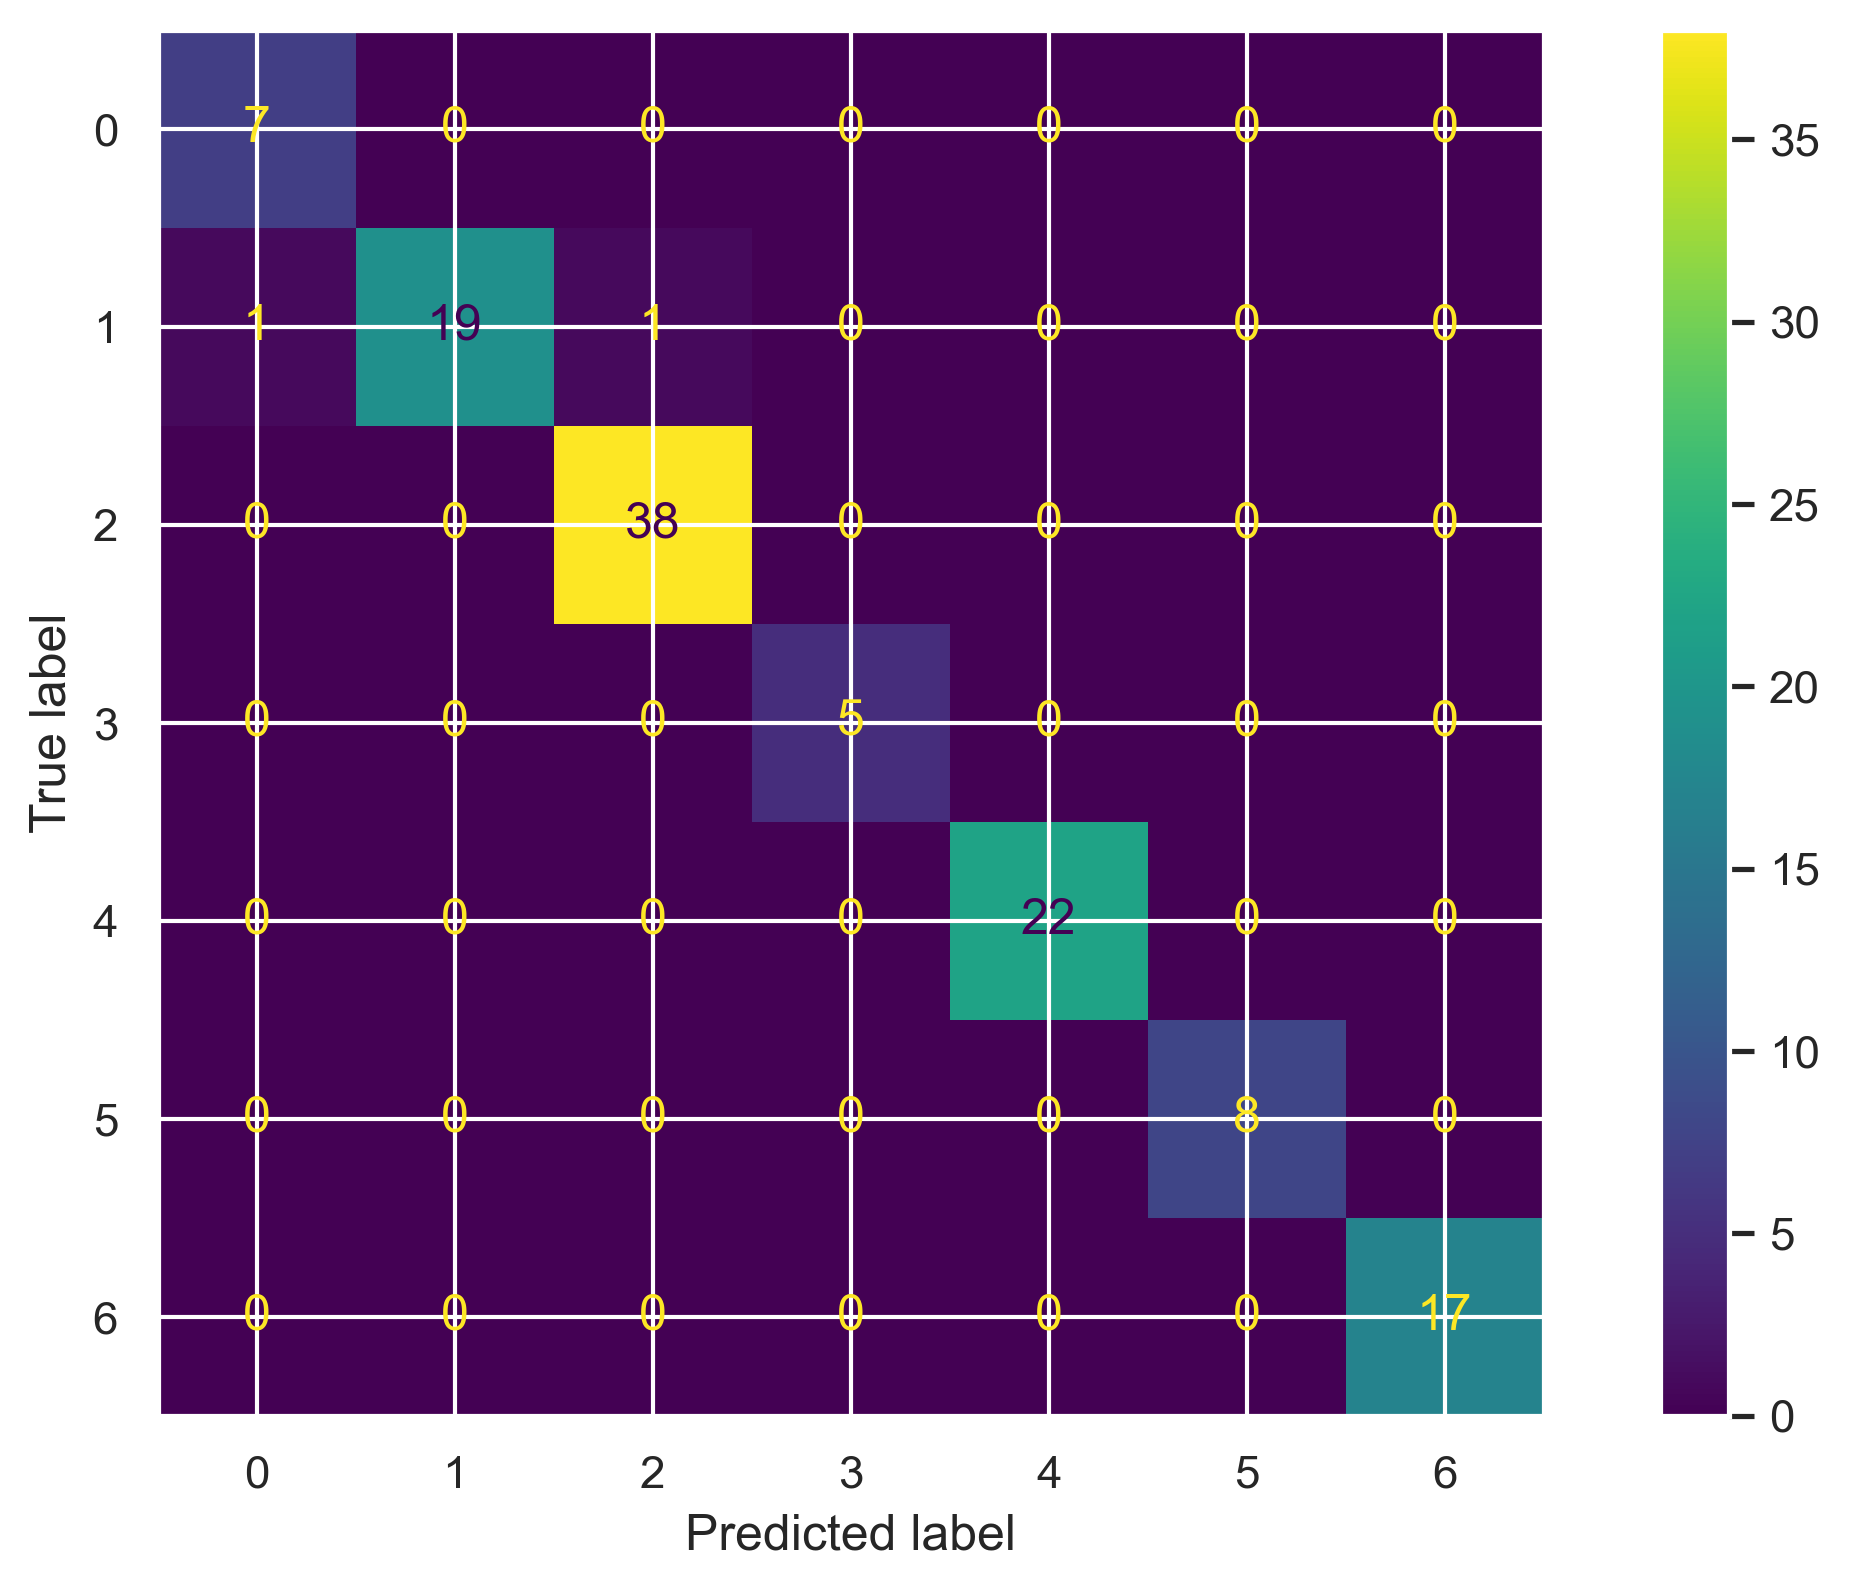

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictions)
plt.show()